In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
df = pd.read_csv('ER_Wait_Times.csv')

In [6]:
# Parse datetime if needed
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Hour'] = df['Arrival_Time'].dt.hour
df['Day of Week'] = df['Arrival_Time'].dt.day_name()

In [25]:
# --- 5. KPI Cards: Summary Stats ---
print("KPI Summary:")
print(f"Average Wait Time: {df['Wait_Time_Minutes'].mean():.2f}")
print(f"Median Wait Time: {df['Wait_Time_Minutes'].median():.2f}")
print(f"Max Wait Time: {df['Wait_Time_Minutes'].max():.2f}")
print(f"Total Records: {df['Wait_Time_Minutes'].count()}")

KPI Summary:
Average Wait Time: 44.61
Median Wait Time: 45.00
Max Wait Time: 102.00
Total Records: 500


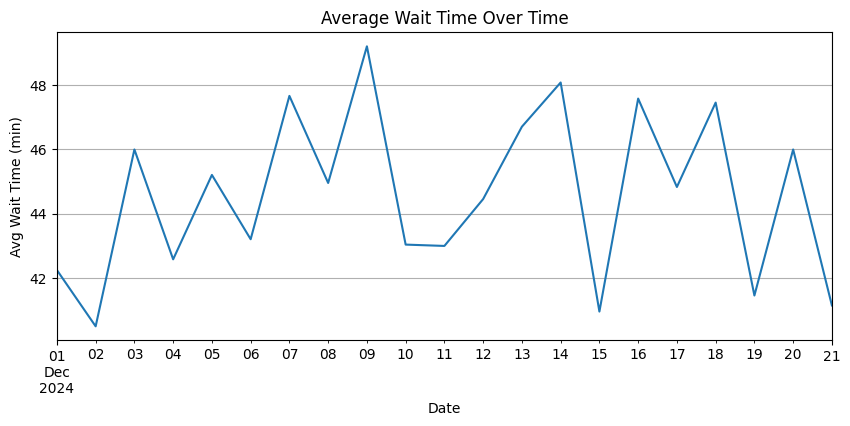

In [36]:
# 1. Line Chart: Wait Time Trend Over Time
plt.figure(figsize=(10, 4))
df_resampled = df.set_index("Arrival_Time").resample("D")["Wait_Time_Minutes"].mean()
df_resampled.plot(title="Average Wait Time Over Time")
plt.ylabel("Avg Wait Time (min)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

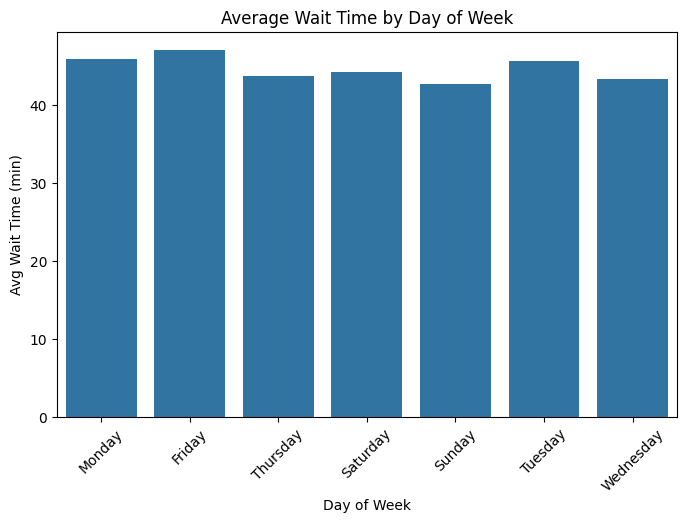

In [35]:
# 2. Bar Chart: Wait Time by Day of Week
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Day_of_Week", y="Wait_Time_Minutes", estimator=np.mean, errorbar=None)
plt.title("Average Wait Time by Day of Week")
plt.ylabel("Avg Wait Time (min)")
plt.xlabel("Day of Week")
plt.xticks(rotation=45)
plt.show()

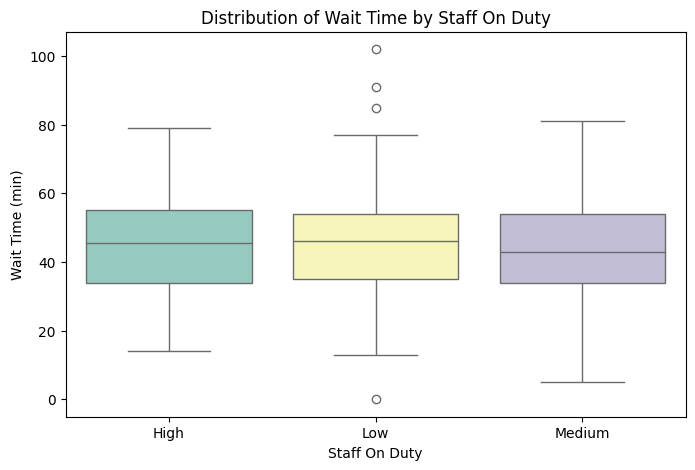

In [45]:
# 3. Box Plot: Wait Time by Staff Level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Staff_On_Duty", y="Wait_Time_Minutes", hue="Staff_On_Duty", palette="Set3", legend=False)
plt.title("Distribution of Wait Time by Staff On Duty")
plt.ylabel("Wait Time (min)")
plt.xlabel("Staff On Duty")
plt.show()

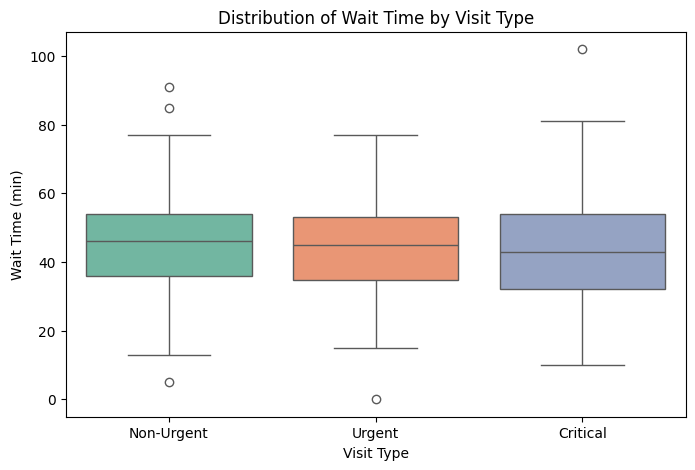

In [46]:
# 4. Box Plot: Wait Time by Visit Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="ER_Visit_Type", y="Wait_Time_Minutes", hue="ER_Visit_Type", palette="Set2", legend=False)
plt.title("Distribution of Wait Time by Visit Type")
plt.ylabel("Wait Time (min)")
plt.xlabel("Visit Type")
plt.show()

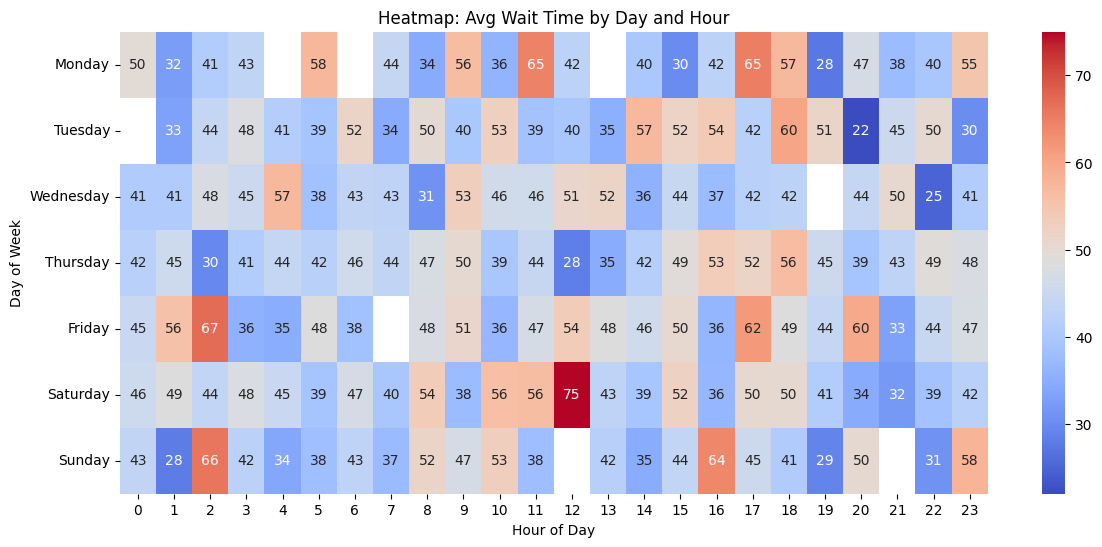

In [27]:
# 5. Matrix (Heatmap): Avg Wait Time by Day of Week and Hour
df["Hour"] = df["Arrival_Time"].dt.hour
pivot_table = df.pivot_table(index="Day_of_Week", columns="Hour", values="Wait_Time_Minutes", aggfunc="mean")
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(days_order)

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Heatmap: Avg Wait Time by Day and Hour")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()